In [3]:
import numpy as np
from numpy.random import randn
import pandas as pd
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
dataset = randn(25)

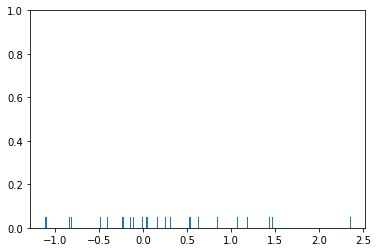

In [5]:
sns.rugplot(dataset)

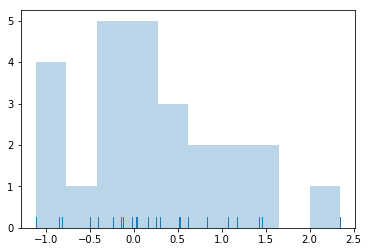

In [6]:
plt.hist(dataset, alpha=0.3)
sns.rugplot(dataset)

(0, 1)

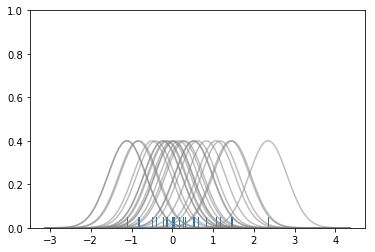

In [13]:
sns.rugplot(dataset)
x_min = dataset.min() - 2
x_max = dataset.max() + 2
x_axis = np.linspace(x_min, x_max, 100)

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**0.2

kernel_list = []
for data_point in dataset:
    kernel = stats.norm(data_point, bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    kernel = kernel / kernel.max()
    kernel = kernel * 0.4
    plt.plot(x_axis, kernel, color = 'gray', alpha=0.5)
plt.ylim(0,1)

Text(0.5,0.98,'Sum of the Basis Functions')

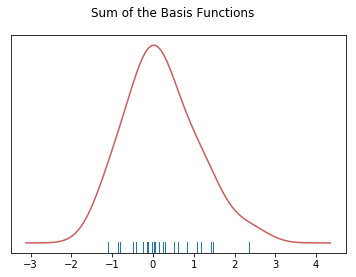

In [14]:
sum_of_kde = np.sum(kernel_list, axis=0)

fig = plt.plot(x_axis, sum_of_kde, color='indianred')
sns.rugplot(dataset)
plt.yticks([])
plt.suptitle('Sum of the Basis Functions')

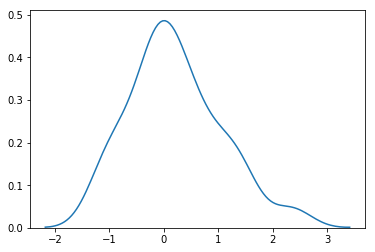

In [15]:
sns.kdeplot(dataset)

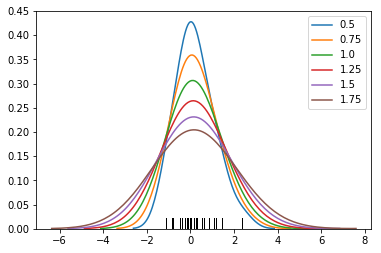

In [16]:
sns.rugplot(dataset, color='black')
for bw in np.arange(0.5, 2, 0.25):
    sns.kdeplot(dataset, bw=bw, label=bw)

In [17]:
kernel_options = ['biw', 'cos', 'epa', 'gau', 'tri', 'triw']

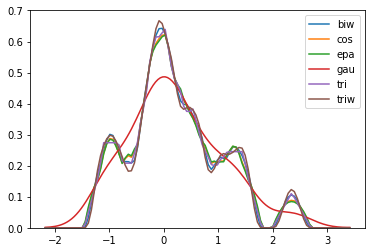

In [18]:
for kern in kernel_options:
    sns.kdeplot(dataset, kernel=kern, label=kern)

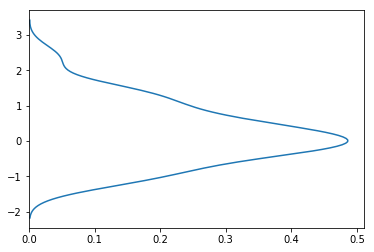

In [19]:
sns.kdeplot(dataset, vertical=True)

(array([  4.,   5.,  10.,  15.,  18.,  20.,  22.,  24.,  24.,  25.]),
 array([-1.11330928, -0.76725646, -0.42120364, -0.07515082,  0.270902  ,
         0.61695481,  0.96300763,  1.30906045,  1.65511327,  2.00116609,
         2.34721891]),
 <a list of 10 Patch objects>)

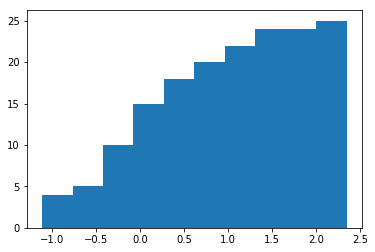

In [21]:
plt.hist(dataset, cumulative=True)

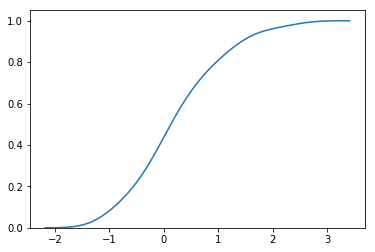

In [22]:
sns.kdeplot(dataset, cumulative=True)

In [23]:
mean=[0,0]
cov=[[1,0], [0,100]]
dataset2 = np.random.multivariate_normal(mean, cov, 1000)

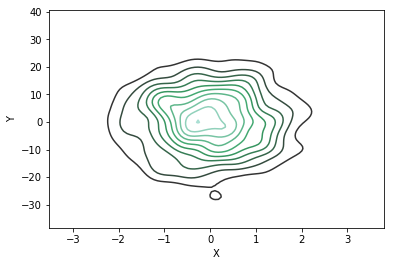

In [27]:
dframe = pd.DataFrame(dataset2, columns=['X', 'Y'])
sns.kdeplot(dframe.X, dframe.Y)

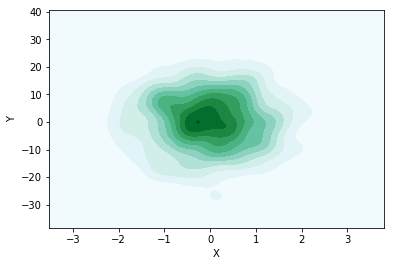

In [28]:
sns.kdeplot(dframe.X, dframe.Y, shade=True)

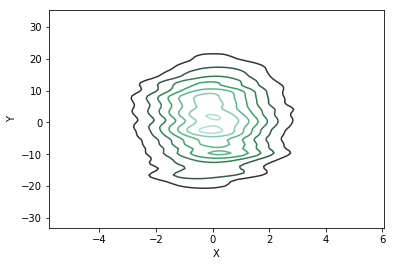

In [29]:
sns.kdeplot(dframe.X, dframe.Y, bw=1)

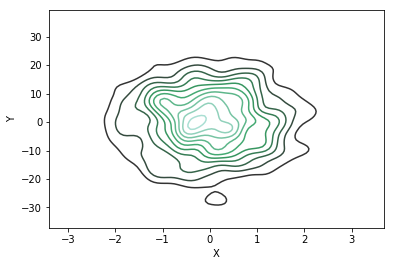

In [36]:
sns.kdeplot(dframe.X, dframe.Y, bw='silverman')

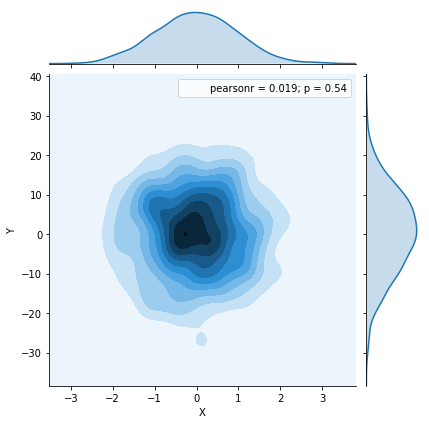

In [37]:
sns.jointplot('X', 'Y', dframe, kind='kde')